In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import numpy as np  

df = pd.read_csv('results.txt', delimiter=',')
res = pd.pivot_table(df, values='accuracy', index=['model', 'Fs', 'cut-off'], columns=['experiment'], aggfunc="mean")
res[['E1','E2','E3','E4', 'F10','E10','F11','E11','F12']]
res['F10'] = (res['E10'] + res['F10'])/2
res['F11'] = (res['E11'] + res['F11'])/2
# res[['E1','E2','E5','E6', 'F10','E11','F12']]
barRes = pd.DataFrame()
# barRes['CV_NN'] = 

def barDFMaker(res, mode):
    if mode == 'onBody':
        temp  = res[[ 'F10','F11','F12']].groupby(['model','Fs']).mean().T.mean().reset_index()
    elif mode == 'offBody':
        temp  = res[[ 'E4','E5','E6' ]].groupby(['model','Fs']).mean().T.mean().reset_index()
    else:
        temp  = res[['E4','E5','E6' ,'E10','E11','F12']].groupby(['model','Fs']).mean().T.mean().reset_index()
    result = {}
    result['CV_NN'] = list(temp[temp['model']=='CV_NN'].drop(['model','Fs'], axis=1)[0])
    result['IQSplit'] = list(temp[temp['model']=='IQSplit'].drop(['model','Fs'], axis=1)[0])
    result['Fs'] = temp[temp['model']=='CV_NN']['Fs']
    result = pd.DataFrame(result)
    return result


# temp  = res[[ 'E10','E11','F12']].groupby(['model','Fs']).mean().T.mean().reset_index()
# temp[temp['model']=='CV_NN']

barDFMaker(res, 'onBody')


,CV_NN,IQSplit,Fs
0,0.353861,0.541589,2.5
1,0.544385,0.580611,5.0
2,0.678557,0.599539,10.0
3,0.821869,0.730534,100.0


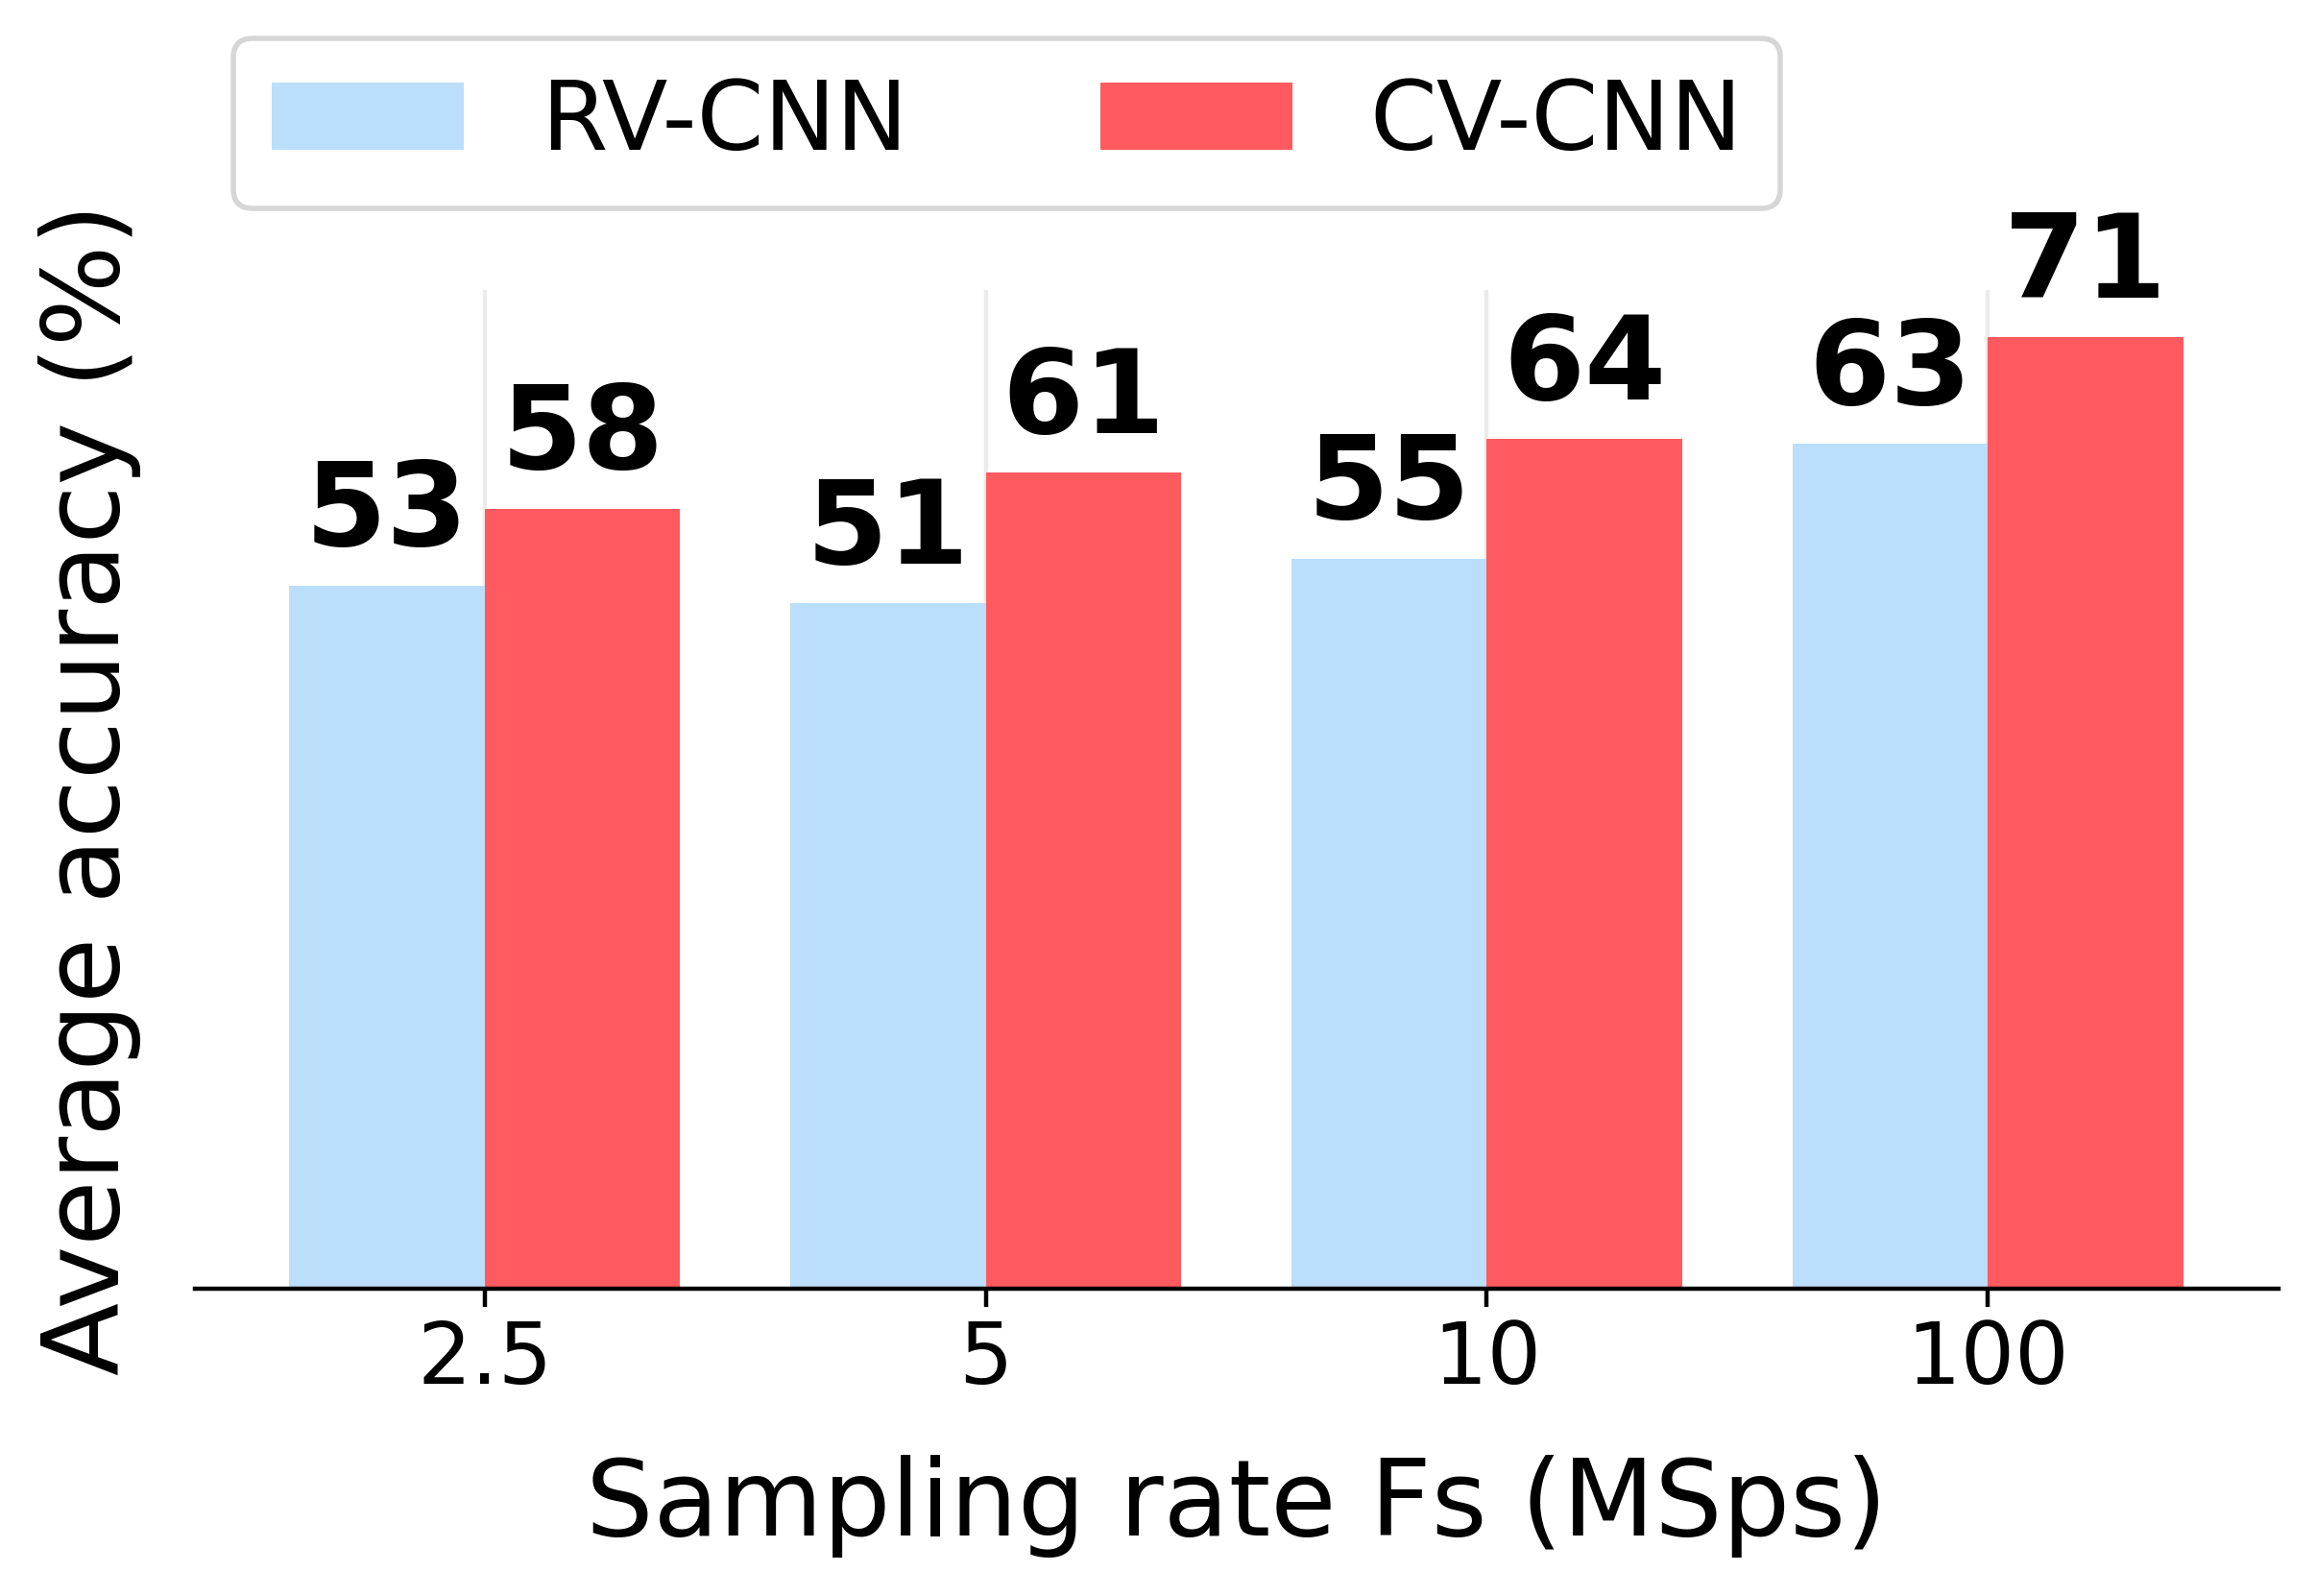

In [77]:
def barplotter(newerdf, title = ""):
    fig, ax = plt.subplots(figsize=(7,4), dpi = 400)
    barWidth = 0.39

    fs2 = np.arange(len(newerdf['Fs']))
    fs = [l + barWidth for l in fs2]
    labelTicker =  [l+barWidth/2 for l in fs2]
    # Plot bars
    # bar1 = ax.bar(fs, newerdf['CV_NN'], width=barWidth, label='CV_CNN',color = ) # [str(fs) for fs in  newerdf['Fs']]
    # bar2 = ax.bar(fs2, newerdf['IQSplit'], width=barWidth,label='RV_CNN',color = )
    # Create the grid 
    ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
    ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

    # Reformat x-axis label and tick labels
    ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.3f}')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=16, labelrotation=0)
    labels = ['2.5', '5', '10', '100']
    ax.set_xticks(labelTicker, labels) # Map integers numbers from the series to labels list

    # Reformat y-axis
    ax.set_ylabel('Average accuracy (%)', fontsize=20, labelpad=10)
    ax.set_xlabel('Sampling rate Fs (MSps)', fontsize=20, labelpad=10)
    
    ax.yaxis.set_label_position("left")
    ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.2f}')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=22)



    # Remove the spines
    ax.spines[['top','left','right']].set_visible(False)

    # Make the left spine thicker
    # ax.spines['right'].set_linewidth(1.1)

    # Add in red line and rectangle on top
    # ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
    # ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

    # Add in title and subtitle
    # ax.text(x=.15, y=.93, s=title, transform=fig.transFigure, ha='left', fontsize=18, weight='bold', alpha=.8)
    # ax.text(x=0.12, y=.90, s="Difference in minutes between scheduled and actual arrival time averaged over each month", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

    # # Set source text
    # ax.text(x=0.1, y=0.12, s="Source: Kaggle - Airlines Delay - https://www.kaggle.com/datasets/giovamata/airlinedelaycauses", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

    # Adjust the margins around the plot area
    plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

    # Set a white background
    fig.patch.set_facecolor('white')

    coloursIQSplit = [ "#bbdefb", "#bbdefb"]

    # Colormap - Build the colour maps
    cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", coloursIQSplit, N=256)
    normIQSplit = mpl.colors.Normalize(newerdf['IQSplit'].min(), newerdf['IQSplit'].max()) # linearly normalizes data into the [0.0, 1.0] interval

    # Plot bars
    bar1 = ax.bar(fs2, newerdf['IQSplit'], color=cmap(normIQSplit(newerdf['IQSplit'])), width=barWidth, zorder=2,label='RV-CNN')

    coloursCV_NN = ["#ff5a5f", "#ff5a5f"]


    # Colormap - Build the colour maps
    cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", coloursCV_NN, N=256)
    normCV_NN = mpl.colors.Normalize(newerdf['CV_NN'].min(), newerdf['CV_NN'].max()) # linearly normalizes data into the [0.0, 1.0] interval

    # Plot bars
    bar2 = ax.bar(fs, newerdf['CV_NN'], color=cmap(normCV_NN(newerdf['CV_NN'])), width=barWidth, zorder=2,label='CV-CNN')

    ax.legend(ncol=2,  fontsize=18, bbox_to_anchor=(0.39, 1.3), loc='upper center')

    # Add label on top of each bar
    ax.bar_label(bar2, labels=[f'{int(np.round(e*100,1))}' for e in newerdf['CV_NN']], padding=3, color='black', fontsize=22, weight='bold')
    ax.bar_label(bar1, labels=[f'{int(np.round(e*100,1))}' for e in newerdf['IQSplit']], padding=3, color='black', fontsize=22, weight='bold')

    # plt.title(title, fontsize=16, weight='bold', alpha=.8)
    plt.yticks([])
    plt.show()

font = {
    # 'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 22}

mpl.rc('font', **font)

barplotter(barDFMaker(res, 'offBody'), "Average accuracy vs different sampling frequencies (Off-Body)")



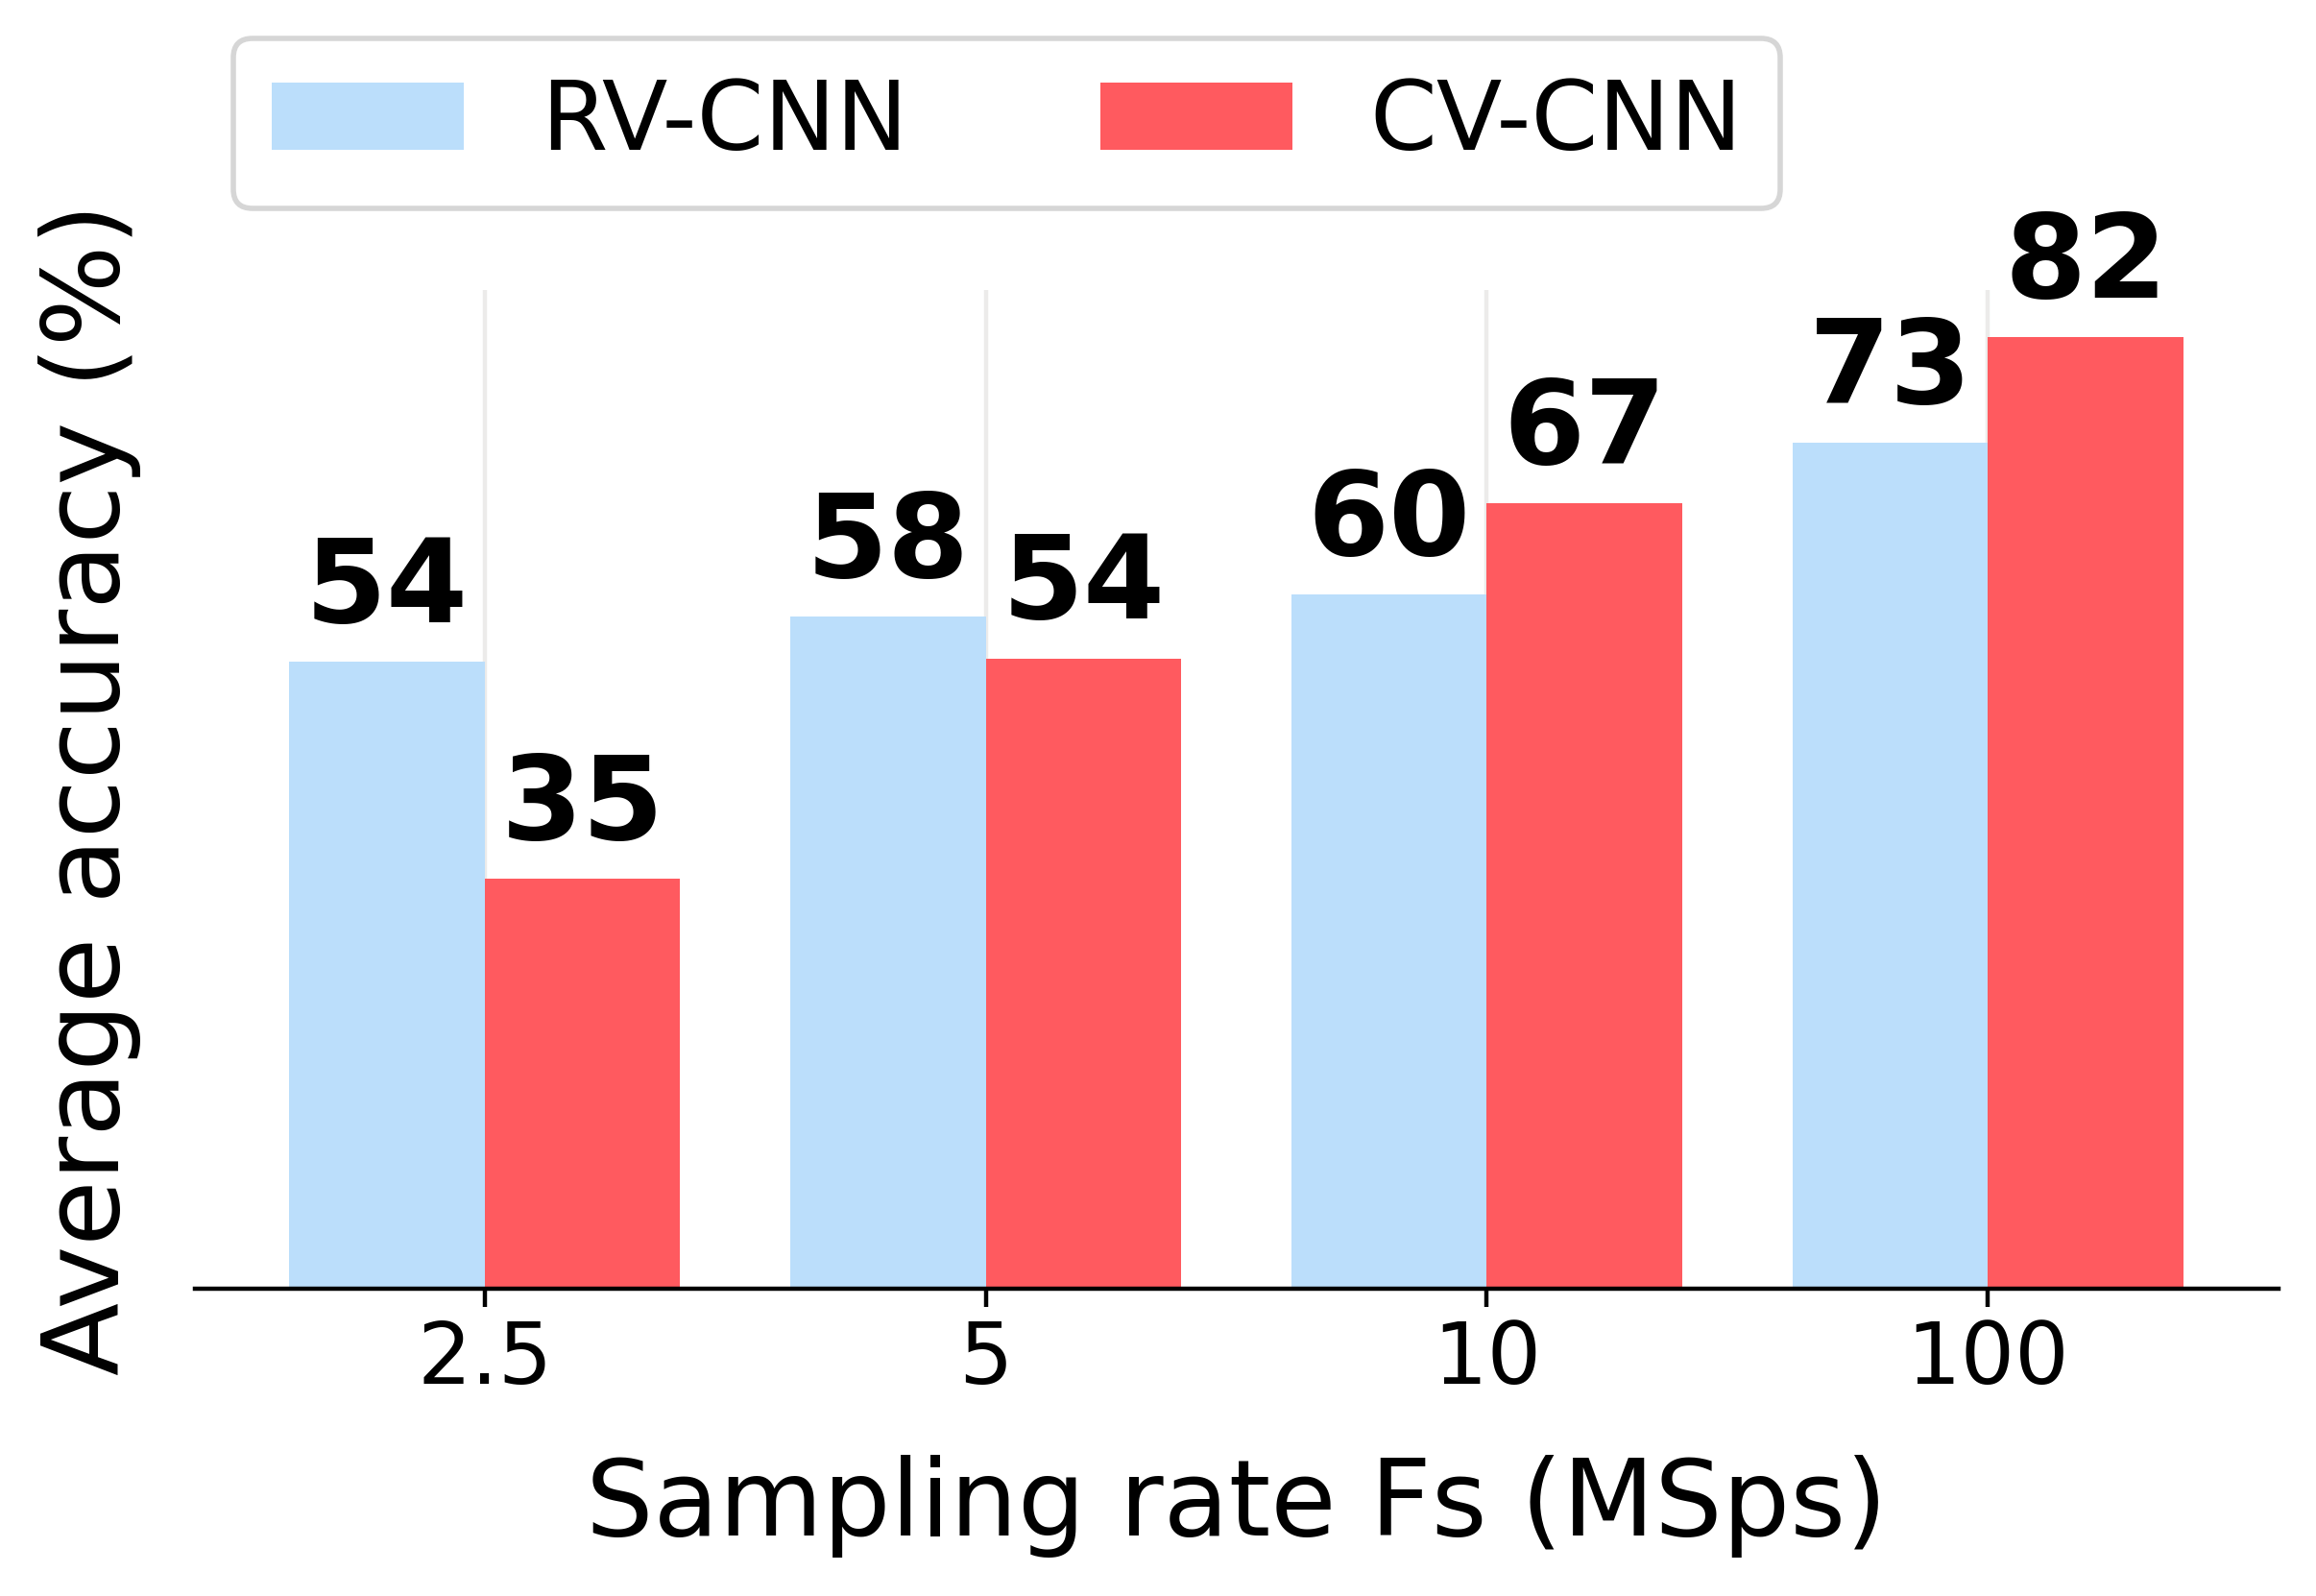

In [78]:
barplotter(barDFMaker(res,'onBody'), "Average accuracy vs different sampling frequencies (On-Body)")

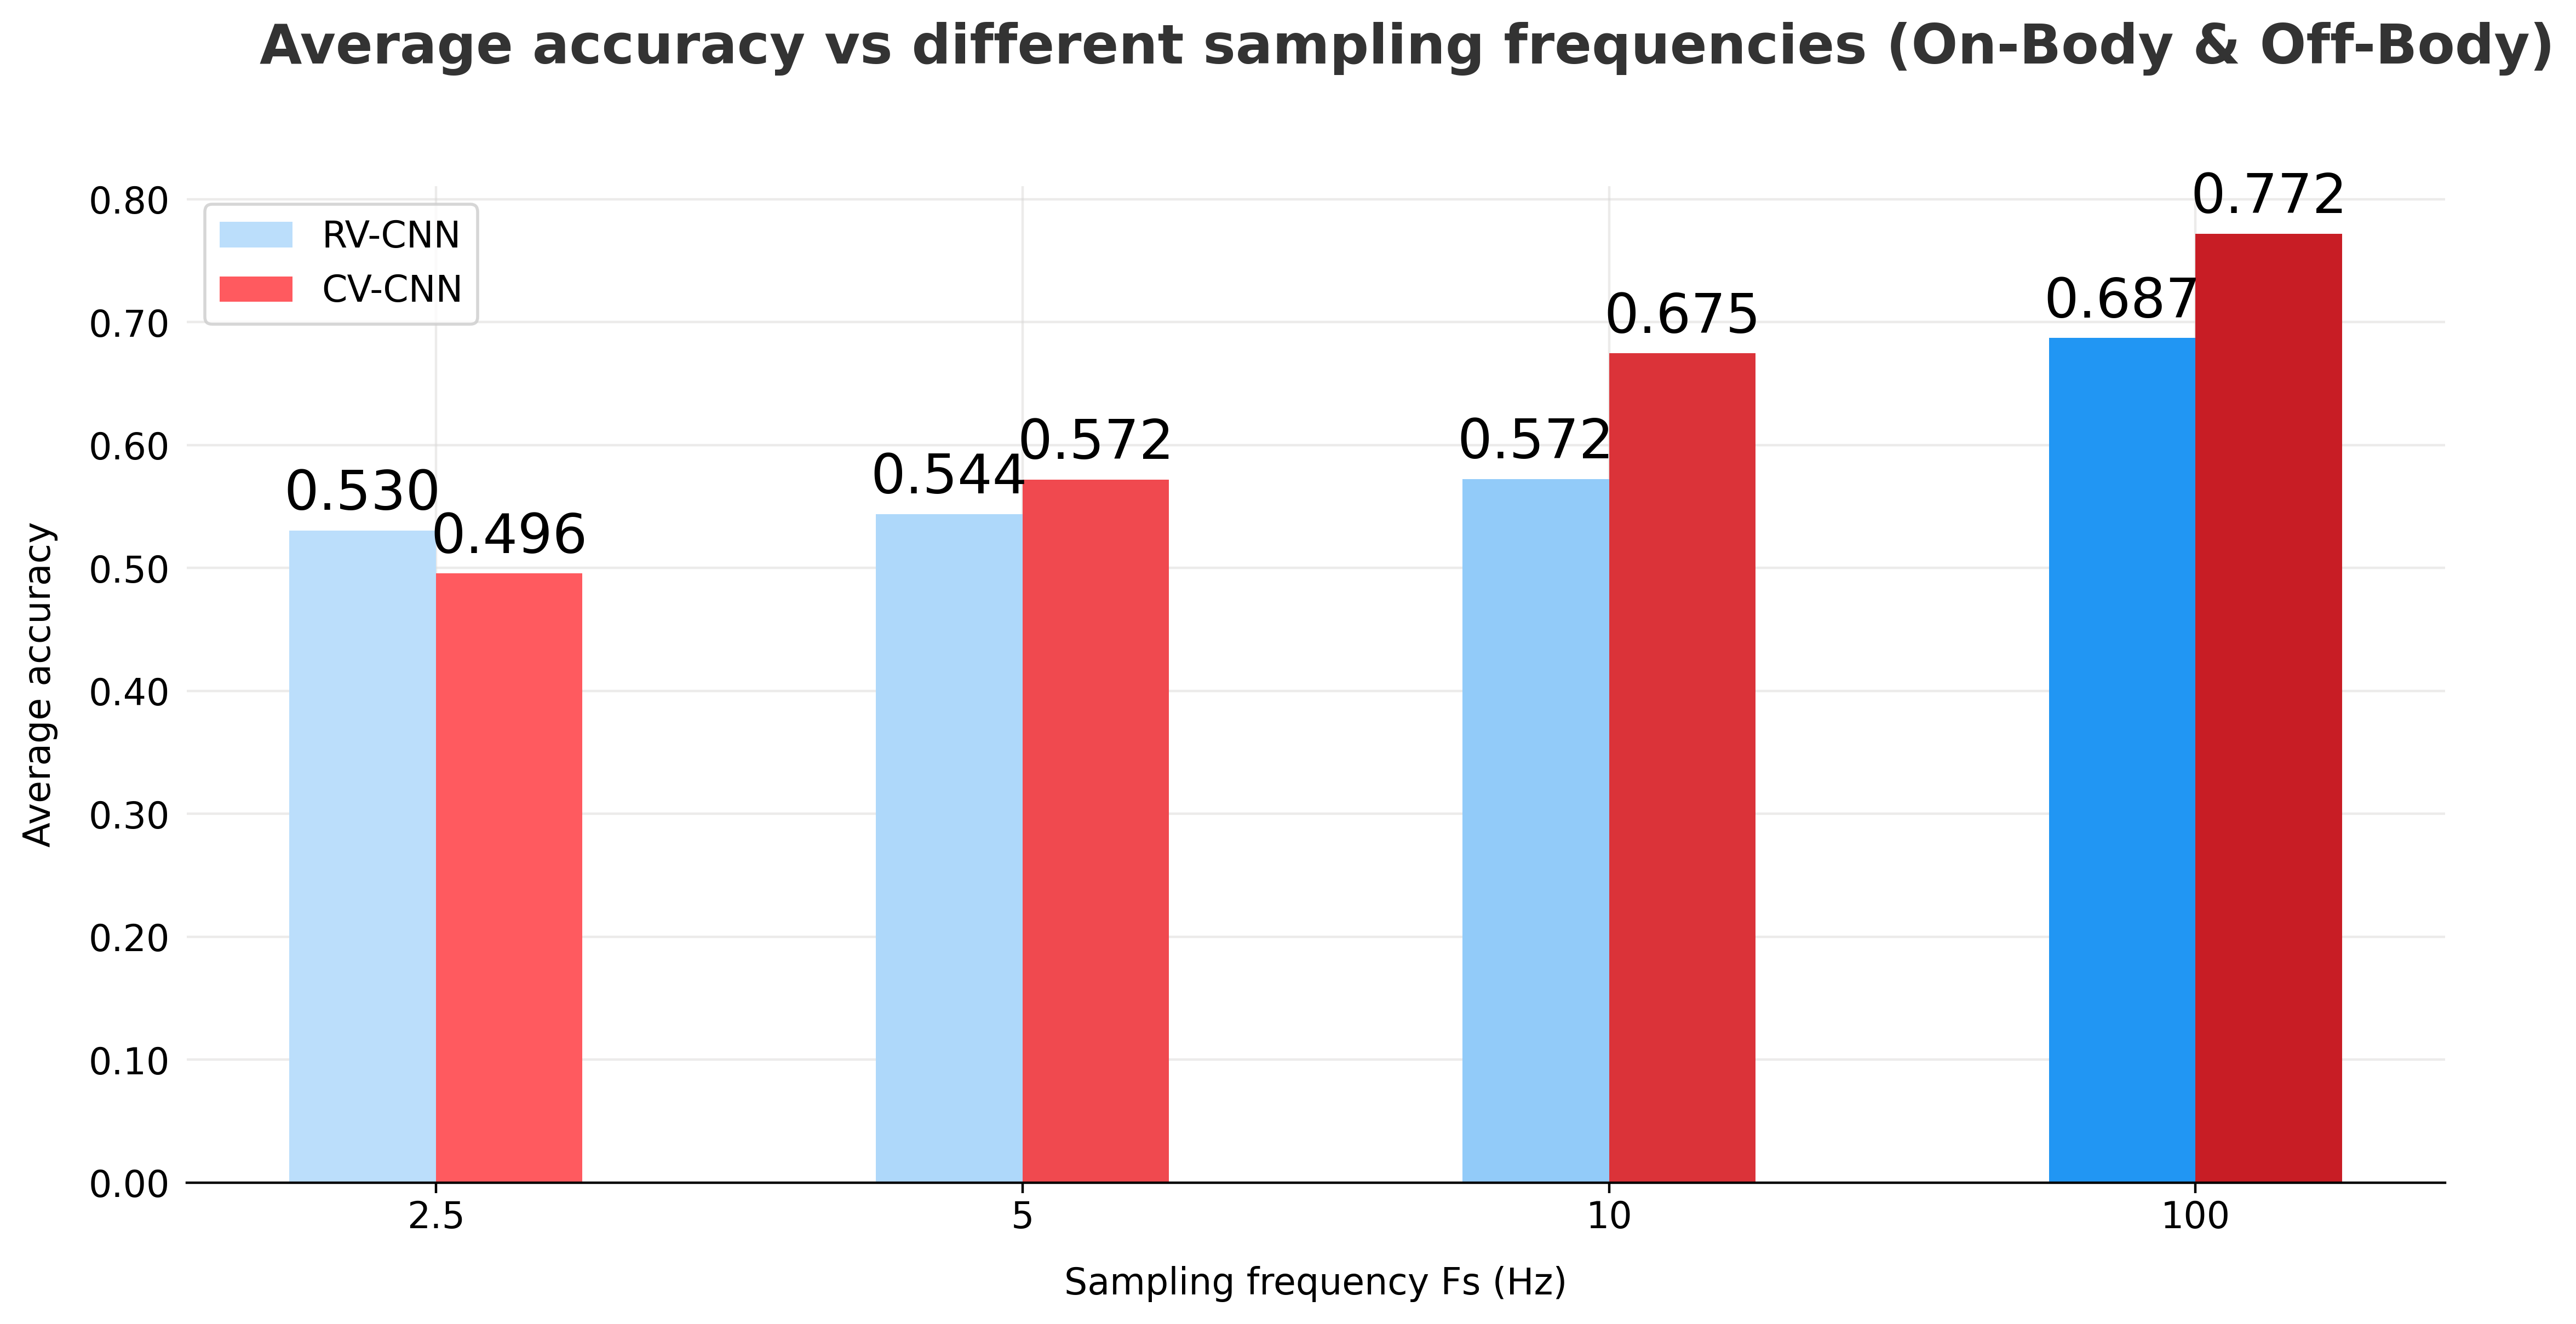

In [17]:


barplotter(barDFMaker(res, 'both'), "Average accuracy vs different sampling frequencies (On-Body & Off-Body)")

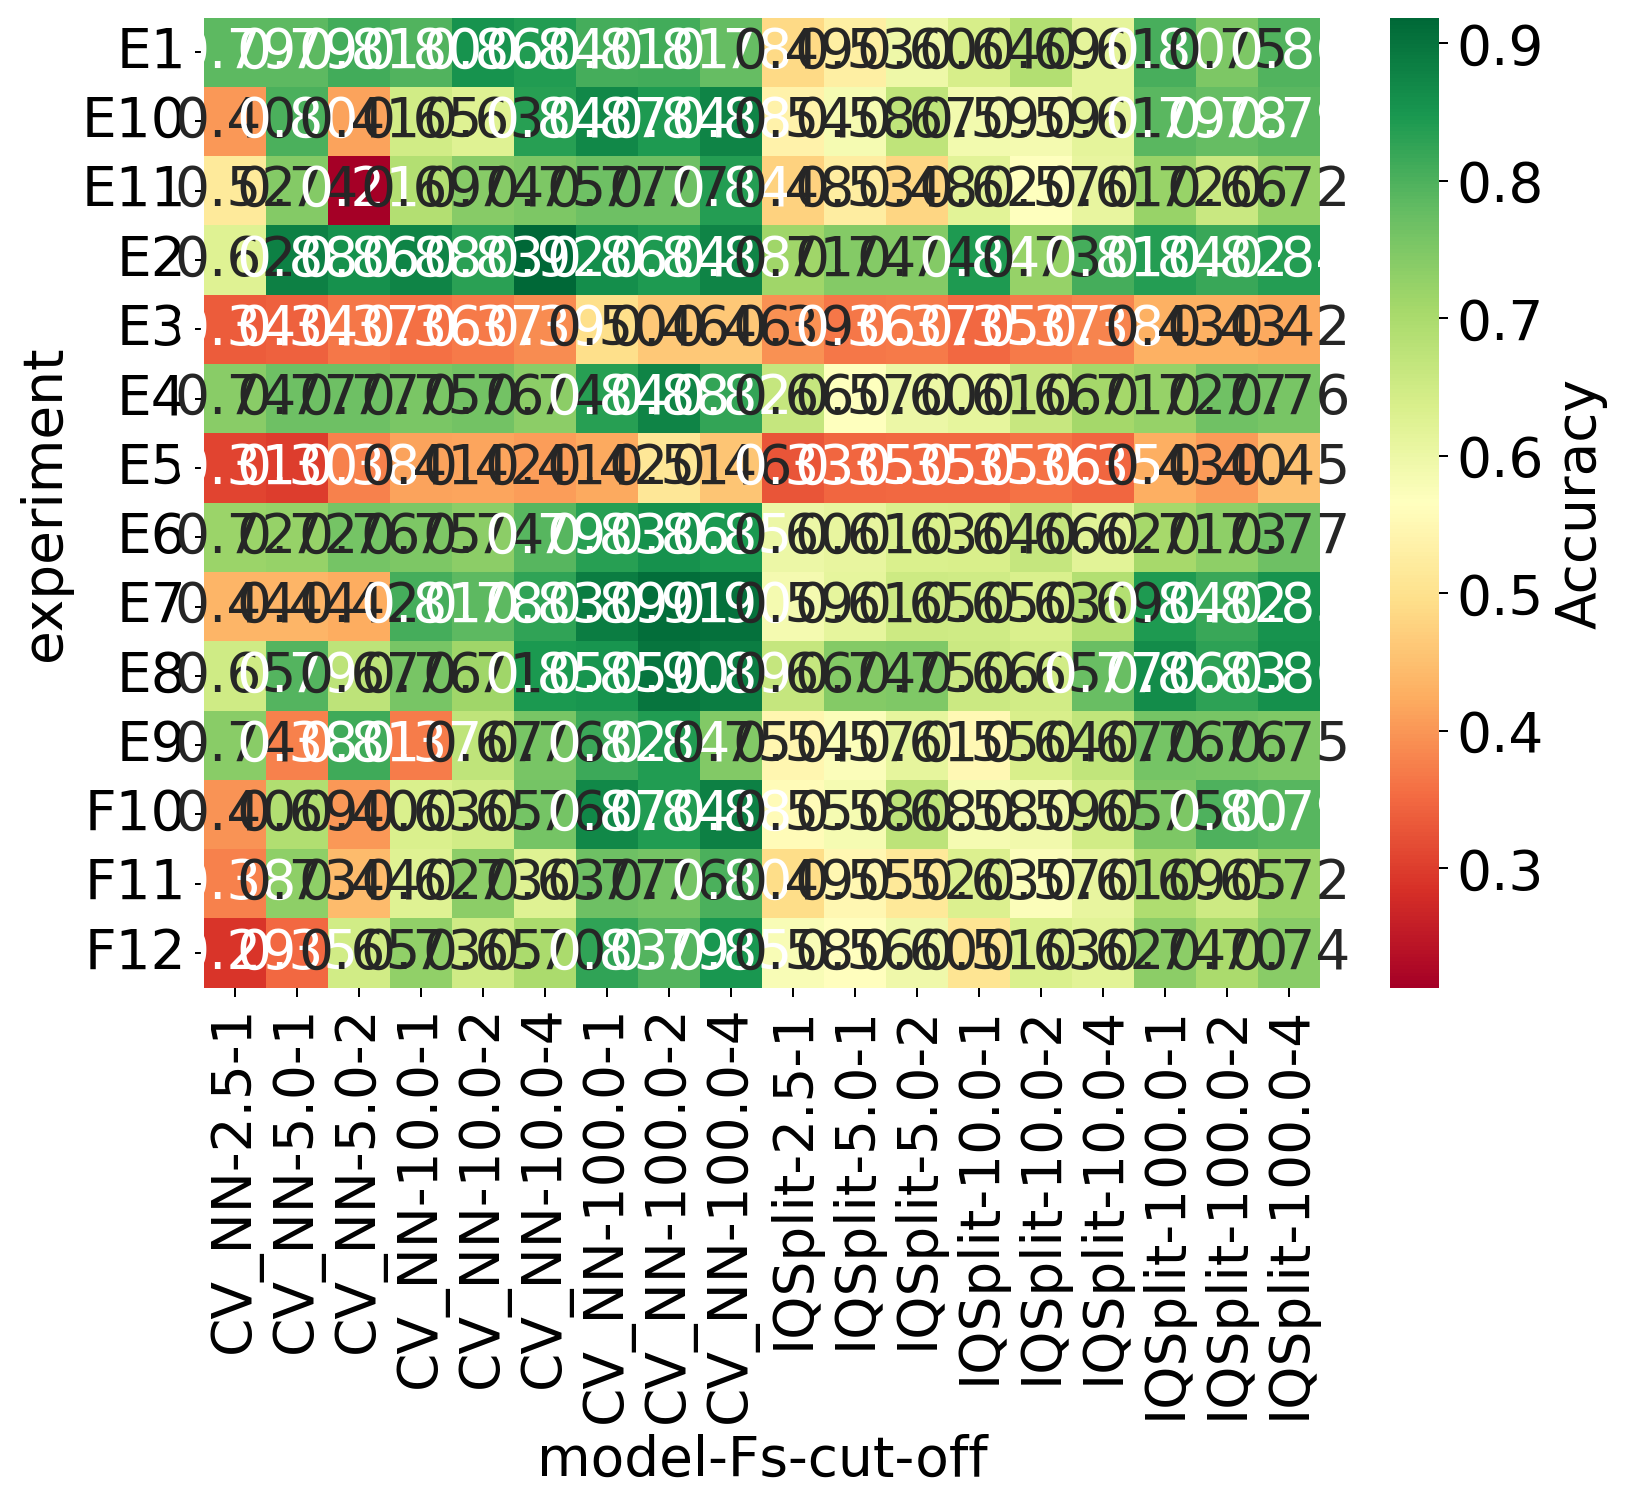

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7), dpi=180  )

sns.heatmap(res.T, cmap="RdYlGn", annot=True, fmt="0.2f", cbar_kws={'label': 'Accuracy'})
plt.show()

In [19]:
from pylab import *



cmap = x = matplotlib.colormaps.get_cmap('RdYlGn')
def get_color(val):
    val = (val - 0.2)/(1- 0.2)
    return matplotlib.colors.rgb2hex(cmap(val) )[1:]
# print(get_color(0.5))


latex_table = r'''
\begin{table}[h!]
\footnotesize
\begin{tabular}{|c|c|c|c|c|c|c|c|c|}
\hline
\multicolumn{3}{|c|}{\textbf{\rotatebox[origin=c]{90}{ \#frames }}}
&\rotatebox[origin=c]{90}{1,448} 
& \rotatebox[origin=c]{90}{797}
& \rotatebox[origin=c]{90}{20,626}
& \rotatebox[origin=c]{90}{20,626}
& \rotatebox[origin=c]{90}{6,055}
&\rotatebox[origin=c]{90}{6,023}\\
    
\hline

\multicolumn{3}{|c|}{ \rotatebox[origin=c]{90}{ Type }}
& \multicolumn{4}{c|}{\textbf{\cellcolor[HTML]{EFEFEF} Off-Body}}
& \multicolumn{2}{c|}{\textbf{\cellcolor[HTML]{EFEFEF} On-Body}}\\ 

\hline


\multicolumn{1}{|c|}{}&\multicolumn{1}{c|}{\textbf{Fs}}& \textbf{\rotatebox[origin=c]{90}{ cut-off }}
& \multicolumn{1}{c|}{}& \multicolumn{1}{c|}{}& \multicolumn{1}{c|}{}& \multicolumn{1}{c|}{}
& \multicolumn{1}{c|}{} &  \\ 

\cline{2-3}

\multicolumn{1}{|c|}{\multirow{-3}{*}{\textbf{\rotatebox[origin=c]{90}{\textbf{model}}}}} 
& \multicolumn{2}{c|}{(MHz)}  & \multicolumn{1}{c|}{\multirow{-3}{*}{\textbf{E1}}} 
& \multicolumn{1}{c|}{\multirow{-3}{*}{\textbf{E2}}} 
& \multicolumn{1}{c|}{\multirow{-3}{*}{\textbf{E5}}} 
& \multirow{-3}{*}{\textbf{E6}} 
& \multicolumn{1}{c|}{\multirow{-3}{*}{\textbf{E10}}} 
& \multirow{-3}{*}{\textbf{E11}} \\ 

\hline
'''
cnt = 1
for index, row in res.T.iterrows():
    
    if cnt%9 == 0:
        model = r"\multirow{-9}{*}{\rotatebox[origin=c]{90}{\textbf{\cellcolor[HTML]{EFEFEF}\large " + ('CV-CNN' if index[0]=='CV_NN' else "IQ Splitting" ) + r"}}}"
    else:
        model = r'\multicolumn{1}{|c|}{\cellcolor[HTML]{EFEFEF}}'
    fs = index[1]
    cutoff = index[2]
    accuracy = row[['E1', 'E2', 'E5', 'E6', 'F10', 'F11']]
    latex_table += f'{model} & {int(fs) if fs!=2.5 else fs} & {cutoff}'
    for acc in accuracy:
        latex_table += ' & \cellcolor[HTML]{'+get_color(acc)+'}'+ f'{acc:.2f}'
    latex_table +=' \\\\\n'
    if cnt%9 == 0:
        latex_table += r'\hline'
    cnt += 1

latex_table += r'''
\end{tabular}
\caption{\footnotesize Fingerprinting accuracy for 12 nodes both on-body and off-body 
using three models including Frequency Deviation, Complex-Valued Neural Network, 
and IQ splitting method. Every model was tested under different sampling frequency $(F_s)$ 
MSps and Butterworth cut-off frequency (cut-off)  MHz.}
\label{tbl:res}
\end{table}

'''

print(latex_table)


IndexError: string index out of range

In [ ]:
res2[['E1','E2','E3','E4', 'F10','F11','F12']].T

model          CV_NN                                                    \
Fs             2.5       5.0                 10.0                        
cut-off            1         1         2         1         2         4   
experiment                                                               
E1          0.786207  0.786207  0.810345  0.796552  0.855172  0.841379   
E2          0.625000  0.881250  0.856250  0.875000  0.831250  0.918750   
E3          0.336563  0.342236  0.365162  0.359017  0.367998  0.386906   
E4          0.739069  0.769085  0.767667  0.754904  0.763649  0.735287   
F10         0.396538  0.691261  0.402721  0.633965  0.647156  0.760511   
F11         0.376139  0.731566  0.443662  0.624689  0.734051  0.625104   
F12         0.288907  0.349338  0.647765  0.730960  0.650248  0.700331   

model                                      IQSplit                      \
Fs             100.0                         2.5       5.0               
cut-off            1         2         4         1         1         2   
experiment                                                               
E1          0.806897  0.810345  0.775862  0.486207  0.527586  0.596552   
E2          0.862500  0.843750  0.875000  0.712500  0.743750  0.743750   
E3          0.496337  0.461120  0.461120  0.394469  0.364689  0.369416   
E4          0.835736  0.876152  0.822737  0.664855  0.566296  0.599385   
F10         0.870981  0.841303  0.881698  0.554823  0.584089  0.675186   
F11         0.769677  0.760563  0.802403  0.492129  0.548053  0.516156   
F12         0.826987  0.793460  0.849752  0.577815  0.564570  0.595613   

model                                                                   
Fs             10.0                          100.0                      
cut-off            1         2         4         1         2         4  
experiment                                                              
E1          0.637931  0.689655  0.613793  0.803448  0.751724  0.796552  
E2          0.843750  0.725000  0.806250  0.837500  0.818750  0.837500  
E3          0.348617  0.368707  0.378398  0.428031  0.428504  0.419995  
E4          0.611203  0.659655  0.708343  0.723470  0.766958  0.758686  
F10         0.584913  0.593157  0.646331  0.751031  0.797609  0.790190  
F11         0.630903  0.572494  0.608948  0.693455  0.652444  0.717481  
F12         0.507450  0.632450  0.619205  0.735927  0.698676  0.737997

In [ ]:
table  = r"""\begin{table*}[]
\centering

\begin{tabular}{|c|c|c|c|ccccccccc|ccccccccc|}
\hline
&\multicolumn{3}{c|}{\textbf{model}}&
\multicolumn{9}{c|}{\cellcolor[HTML]{EFEFEF}\textbf{\large CV-CNN}}&
\multicolumn{9}{c|}{\cellcolor[HTML]{EFEFEF}\textbf{\large RV-CNN}}\\
    \cline{2-21}
&&\textbf{Fs(MSpS)}&
\multicolumn{1}{c|}{2.5}&\multicolumn{2}{c|}{5}&\multicolumn{3}{c|}{10}&
\multicolumn{3}{c|}{100}&\multicolumn{1}{c|}{2.5}&\multicolumn{2}{c|}{5}&
\multicolumn{3}{c|}{10}&\multicolumn{3}{c|}{100}\\
    \cline{3-21}
\multirow{-3}{*}{\rotatebox[origin=c]{90}{Dataset size}}&\multirow{-2}{*}{\multicolumn{2}{c}{\textbf{Experiment} } }
&\multicolumn{1}{c|}{\textbf{Cut-off(MHz)}}&\multicolumn{1}{c|}{1}&
\multicolumn{1}{c|}{1}&\multicolumn{1}{c|}{2}&\multicolumn{1}{c|}{1}&
\multicolumn{1}{c|}{2}&\multicolumn{1}{c|}{4}&\multicolumn{1}{c|}{1}&
\multicolumn{1}{c|}{2}&4&\multicolumn{1}{c|}{1}&\multicolumn{1}{c|}{1}&
\multicolumn{1}{c|}{2}&\multicolumn{1}{c|}{1}&\multicolumn{1}{c|}{2}&
\multicolumn{1}{c|}{4}&\multicolumn{1}{c|}{1}&\multicolumn{1}{c|}{2}& 4\\
    \hline \n"""

r"""\multicolumn{1}{|c|}{\textbf{E1}}&\cellcolor[HTML]{EFEFEF}&\multicolumn{1}{c|}{0.79}&
\multicolumn{1}{c|}{0.79}&\multicolumn{1}{c|}{0.81}&\multicolumn{1}{c|}{0.80}&
\multicolumn{1}{c|}{0.86}&\multicolumn{1}{c|}{0.84}&\multicolumn{1}{c|}{0.81}&
\multicolumn{1}{c|}{0.81}&0.78&\multicolumn{1}{c|}{0.49}&\multicolumn{1}{c|}{0.53}&
\multicolumn{1}{c|}{0.60}&\multicolumn{1}{c|}{0.64}&\multicolumn{1}{c|}{0.69}&
\multicolumn{1}{c|}{0.61}&\multicolumn{1}{c|}{0.80}&\multicolumn{1}{c|}{0.75}& 0.80\\ 
\cline{1-1}
\cline{3-20}"""
size = ['1,448', '797', '20,626', '20,626', '6,055', '6,023', '12,078']
description = [' all nodes pos 4: target node', 'node 6 all pos: target pos', 'all nodes all pos: target pos', 
               'all nodes all pos: target node','body static : target node', 'body moving: target dvc', 'all body: target node']
def category(cnt):
    if cnt == 3:
        return r'\multirow{-4}{*}{\rotatebox[origin=c]{90}{\cellcolor[HTML]{EFEFEF}\textbf{Off-Body}}}'
    return r'\multirow{-2}{*}{\rotatebox[origin=c]{90}{\begin{tabular}{c}  \textbf{\cellcolor[HTML]{EFEFEF}On}\\ \textbf{\cellcolor[HTML]{EFEFEF}Body}\end{tabular}}}'

# \multirow{-4}{*}{\cellcolor[HTML]{EFEFEF}\textbf{Off-Body}}
cnt = 0
for index, row in res[['E1','E2','E5','E6', 'F10','F11','F12']].T.iterrows():
    table+= size[cnt] + r'& & \multicolumn{1}{c|}{\textbf{E' + str(cnt+1) +'}} &' + description[cnt] + '\n'
    # table+= size[cnt] + r'& \multicolumn{1}{|c|}{\textbf{E' + str(cnt+1) +'}} &' + (r' \cellcolor[HTML]{EFEFEF}' if cnt not in [3,5] else category(cnt)) + '\n'
    for acc in row.iloc[0:9]:
        table += r'&\multicolumn{1}{c|}{\cellcolor[HTML]{'+get_color(acc)+'}'+ f'{acc:.2f}' + '}' + '\n'
    table += r'&\cellcolor[HTML]{'+get_color(row.iloc[9])+'}'+ f'{row.iloc[9]:.2f}'  + '\n'
    for acc in row.iloc[10:17]:
        table += r'&\multicolumn{1}{c|}{\cellcolor[HTML]{'+get_color(acc)+'}'+ f'{acc:.2f}' + '}' + '\n'
    table += r'&\cellcolor[HTML]{'+get_color(row.iloc[17])+'}'+ f'{row.iloc[17]:.2f}'  + '\n'
    
    # if cnt !=3:
    #     table += r'\\ \n \cline{1-2} \cline{4-21}' + '\n'
    # else:
    table += r'\\  \hline' + '\n'
    

    

    cnt += 1


table += r"""
\end{tabular}
\caption{\footnotesize Test accuracy (20\% of the dataset) for fingerprinting on-body and off-body scenario using Complex-Valued Convolutional Neural Network, and Real-Valued Convolutional Neural Network each under different sampling frequency $(F_s)$ MSps and different Butterworth cut-off frequency (cut-off)  MHz. The small description indicates the variables and the classification target denoted after ':'. For example, E2 aims to predict the position based on the recordings obtained of node 6 sequentially placed at all positions. pos and dvc are short for position and device.}
\label{tbl:res}
\end{table*}"""



print(table)


\begin{table*}[]
\centering

\begin{tabular}{|c|c|c|ccccccccc|ccccccccc|}
\hline
&\multicolumn{3}{c|}{\textbf{model}}&
\multicolumn{9}{c|}{\cellcolor[HTML]{EFEFEF}\textbf{\large CV-CNN}}&
\multicolumn{9}{c|}{\cellcolor[HTML]{EFEFEF}\textbf{\large RV-CNN}}\\
    \cline{2-21}
&&\textbf{Fs(MSpS)}&
\multicolumn{1}{c|}{2.5}&\multicolumn{2}{c|}{5}&\multicolumn{3}{c|}{10}&
\multicolumn{3}{c|}{100}&\multicolumn{1}{c|}{2.5}&\multicolumn{2}{c|}{5}&
\multicolumn{3}{c|}{10}&\multicolumn{3}{c|}{100}\\
    \cline{3-21}
\multirow{-3}{*}{\rotatebox[origin=c]{90}{Dataset size}}&\multirow{-2}{*}{\multicolumn{2}{c}{\textbf{Experiment}}}
&\multicolumn{1}{c|}{\textbf{Cut-off(MHz)}}&\multicolumn{1}{c|}{1}&
\multicolumn{1}{c|}{1}&\multicolumn{1}{c|}{2}&\multicolumn{1}{c|}{1}&
\multicolumn{1}{c|}{2}&\multicolumn{1}{c|}{4}&\multicolumn{1}{c|}{1}&
\multicolumn{1}{c|}{2}&4&\multicolumn{1}{c|}{1}&\multicolumn{1}{c|}{1}&
\multicolumn{1}{c|}{2}&\multicolumn{1}{c|}{1}&\multicolumn{1}{c|}{2}&
\multicolumn{1}{c|}{4}&\

In [ ]:
r"""\multicolumn{1}{|c|}{\textbf{E1}}&\cellcolor[HTML]{EFEFEF}&\multicolumn{1}{c|}{0.79}&
\multicolumn{1}{c|}{0.79}&\multicolumn{1}{c|}{0.81}&\multicolumn{1}{c|}{0.80}&
\multicolumn{1}{c|}{0.86}&\multicolumn{1}{c|}{0.84}&\multicolumn{1}{c|}{0.81}&
\multicolumn{1}{c|}{0.81}&0.78&\multicolumn{1}{c|}{0.49}&\multicolumn{1}{c|}{0.53}&
\multicolumn{1}{c|}{0.60}&\multicolumn{1}{c|}{0.64}&\multicolumn{1}{c|}{0.69}&
\multicolumn{1}{c|}{0.61}&\multicolumn{1}{c|}{0.80}&\multicolumn{1}{c|}{0.75}& 0.80\\ 
    \cline{1-1}
    \cline{3-20}
\multicolumn{1}{|c|}{\textbf{E2}}&\cellcolor[HTML]{EFEFEF}&\multicolumn{1}{c|}{0.63}&
\multicolumn{1}{c|}{0.88}&\multicolumn{1}{c|}{0.86}&\multicolumn{1}{c|}{0.88}&
\multicolumn{1}{c|}{0.83}&\multicolumn{1}{c|}{0.92}&\multicolumn{1}{c|}{0.86}&
\multicolumn{1}{c|}{0.84}&0.88&\multicolumn{1}{c|}{0.71}&\multicolumn{1}{c|}{0.74}&
\multicolumn{1}{c|}{0.74}&\multicolumn{1}{c|}{0.84}&\multicolumn{1}{c|}{0.73}&
multicolumn{1}{c|}{0.81}&\multicolumn{1}{c|}{0.84}&\multicolumn{1}{c|}{0.82}&0.84\\
    \cline{1-1}
    \cline{3-20}
\multicolumn{1}{|c|}{\textbf{E3}}&\cellcolor[HTML]{EFEFEF}&\multicolumn{1}{c|}{0.31}&
\multicolumn{1}{c|}{0.30}&\multicolumn{1}{c|}{0.38}&\multicolumn{1}{c|}{0.41}&
\multicolumn{1}{c|}{0.42}&\multicolumn{1}{c|}{0.41}&\multicolumn{1}{c|}{0.42}&
\multicolumn{1}{c|}{0.51}&0.46&\multicolumn{1}{c|}{0.33}&\multicolumn{1}{c|}{0.35}&
\multicolumn{1}{c|}{0.35}&\multicolumn{1}{c|}{0.35}&\multicolumn{1}{c|}{0.36}&
\multicolumn{1}{c|}{0.35}&\multicolumn{1}{c|}{0.43}&\multicolumn{1}{c|}{0.40}&0.45\\
    \cline{1-1}
    \cline{3-20}
\multicolumn{1}{|c|}{\textbf{E4}}&\multirow{-4}{*}{\cellcolor[HTML]{EFEFEF}\textbf{Off-Body}}&
\multicolumn{1}{c|}{0.72}&\multicolumn{1}{c|}{0.72}&\multicolumn{1}{c|}{0.76}&\multicolumn{1}{c|}{0.75}&
\multicolumn{1}{c|}{0.74}&\multicolumn{1}{c|}{0.79}&\multicolumn{1}{c|}{0.83}&\multicolumn{1}{c|}{0.86}&0.85&
\multicolumn{1}{c|}{0.60}&\multicolumn{1}{c|}{0.61}&\multicolumn{1}{c|}{0.63}&\multicolumn{1}{c|}{0.64}&
\multicolumn{1}{c|}{0.66}&\multicolumn{1}{c|}{0.62}&\multicolumn{1}{c|}{0.71}&\multicolumn{1}{c|}{0.73}&0.77\\
    \hline
\multicolumn{1}{|c|}{\textbf{E5}}&\cellcolor[HTML]{EFEFEF}&\multicolumn{1}{c|}{0.40}&\multicolumn{1}{c|}{0.69}&
\multicolumn{1}{c|}{0.40}&\multicolumn{1}{c|}{0.63}&\multicolumn{1}{c|}{0.65}&\multicolumn{1}{c|}{0.76}&
\multicolumn{1}{c|}{0.87}&\multicolumn{1}{c|}{0.84}&0.88&\multicolumn{1}{c|}{0.55}&\multicolumn{1}{c|}{0.58}&
\multicolumn{1}{c|}{0.68}&\multicolumn{1}{c|}{0.58}&\multicolumn{1}{c|}{0.59}&\multicolumn{1}{c|}{0.65}&
\multicolumn{1}{c|}{0.75}&\multicolumn{1}{c|}{0.80}&0.79\\
    \cline{1-1}
    \cline{3-20}
\multicolumn{1}{|c|}{\textbf{E6}}&\multirow{-2}{*}{\cellcolor[HTML]{EFEFEF}\textbf{on-Body}}&
\multicolumn{1}{c|}{0.38}&\multicolumn{1}{c|}{0.73}&\multicolumn{1}{c|}{0.44}&\multicolumn{1}{c|}{0.62}&
\multicolumn{1}{c|}{0.73}&\multicolumn{1}{c|}{0.63}&\multicolumn{1}{c|}{0.77}&\multicolumn{1}{c|}{0.76}&0.80&
\multicolumn{1}{c|}{0.49}&\multicolumn{1}{c|}{0.55}&\multicolumn{1}{c|}{0.52}&\multicolumn{1}{c|}{0.63}&
\multicolumn{1}{c|}{0.57}&\multicolumn{1}{c|}{0.61}&\multicolumn{1}{c|}{0.69}&\multicolumn{1}{c|}{0.65}&0.72\\"""

'\\multicolumn{1}{|c|}{\\textbf{E1}}&\\cellcolor[HTML]{EFEFEF}&\\multicolumn{1}{c|}{0.79}&\n\\multicolumn{1}{c|}{0.79}&\\multicolumn{1}{c|}{0.81}&\\multicolumn{1}{c|}{0.80}&\n\\multicolumn{1}{c|}{0.86}&\\multicolumn{1}{c|}{0.84}&\\multicolumn{1}{c|}{0.81}&\n\\multicolumn{1}{c|}{0.81}&0.78&\\multicolumn{1}{c|}{0.49}&\\multicolumn{1}{c|}{0.53}&\n\\multicolumn{1}{c|}{0.60}&\\multicolumn{1}{c|}{0.64}&\\multicolumn{1}{c|}{0.69}&\n\\multicolumn{1}{c|}{0.61}&\\multicolumn{1}{c|}{0.80}&\\multicolumn{1}{c|}{0.75}& 0.80\\\\ \n    \\cline{1-1}\n    \\cline{3-20}\n\\multicolumn{1}{|c|}{\\textbf{E2}}&\\cellcolor[HTML]{EFEFEF}&\\multicolumn{1}{c|}{0.63}&\n\\multicolumn{1}{c|}{0.88}&\\multicolumn{1}{c|}{0.86}&\\multicolumn{1}{c|}{0.88}&\n\\multicolumn{1}{c|}{0.83}&\\multicolumn{1}{c|}{0.92}&\\multicolumn{1}{c|}{0.86}&\n\\multicolumn{1}{c|}{0.84}&0.88&\\multicolumn{1}{c|}{0.71}&\\multicolumn{1}{c|}{0.74}&\n\\multicolumn{1}{c|}{0.74}&\\multicolumn{1}{c|}{0.84}&\\multicolumn{1}{c|}{0.73}&\nmulticolumn{1